**Multiple Lineer Regression**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df= pd.read_csv("Advertising.csv", index_col=0)

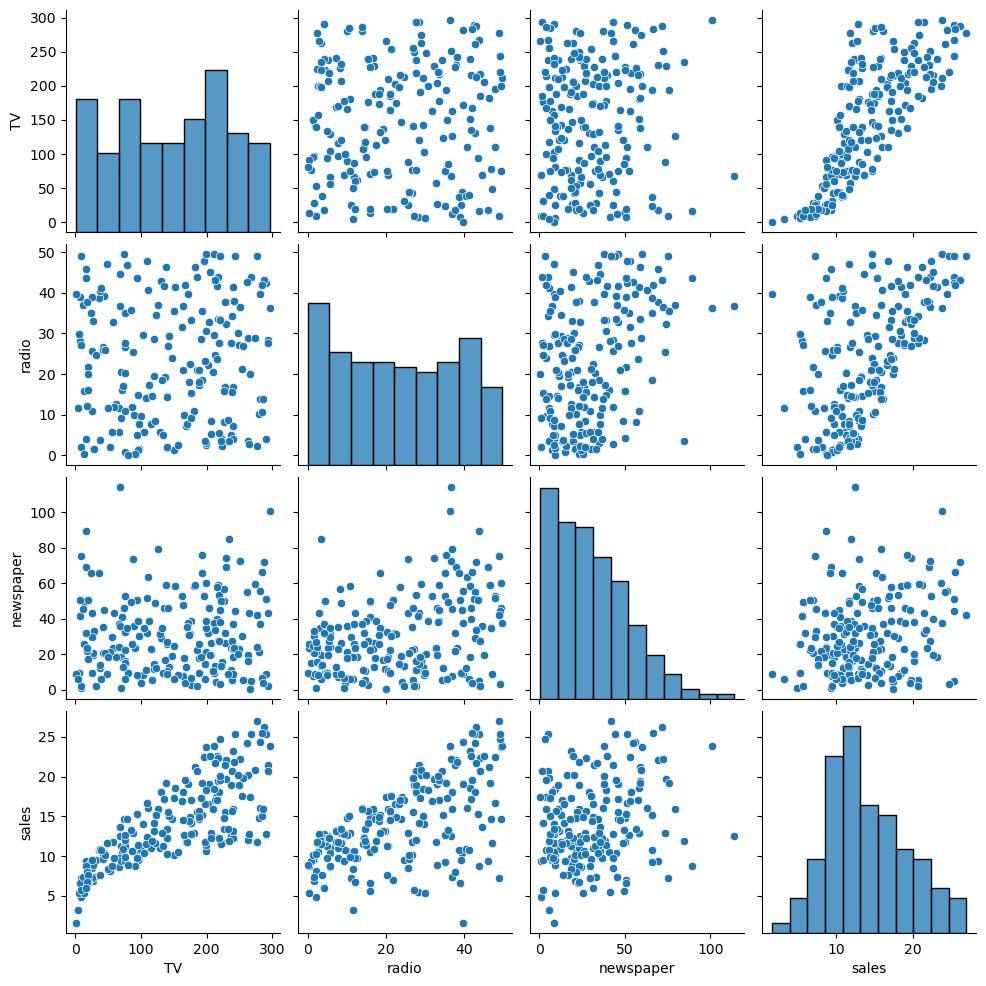

In [5]:
#İkili grafik çizme
sns.pairplot(df)

In [6]:
X=df[["TV", "radio", "newspaper"]]
y=df[["sales"]]

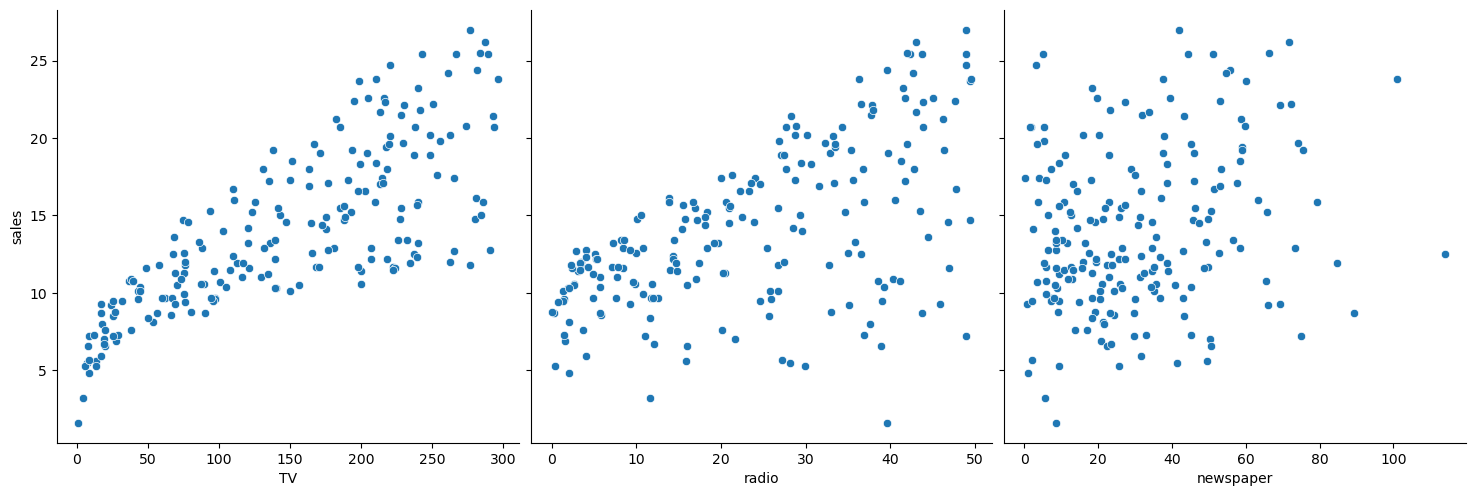

In [7]:
# sadece girdiler -> çıktı ikilisi
sns.pairplot(df, x_vars=df.columns[:3], y_vars=df.columns[3], height=5)

In [8]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [9]:
y=y.values.reshape(-1,1) #X'e zaten yukarıda 3 tane boyut vermiştik. 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
#intercept=her şeyin sıfır olduğu y'nin tek değeri,Beta0, y=beta0+0(beta1)+0(beta2)
print("intercept: ", lr.intercept_)

intercept:  [2.65278967]


In [25]:
#Coeffificient, slope -> beta 1, beta 2, beta 3
print("Coefficient (eğim): ", lr.coef_)

Coeffificient (eğim):  [[0.0454256  0.18975773 0.00460308]]


In [26]:
#Coefin uzun hali
katsayilar = pd.DataFrame(lr.coef_, columns = ['beta_1 (TV)', 'beta_2 (Radio)', 'beta_3 (Newspaper)'])
katsayilar
#Burada newspaper'ın katsayısı çok düşük neredeyse etki etmiyor.

,beta_1 (TV),beta_2 (Radio),beta_3 (Newspaper)
0,0.045426,0.189758,0.004603


In [27]:
ypred=lr.predict(X_test)

In [28]:
ypred[0:10]

array([[10.62160072],
       [20.00625302],
       [16.91850882],
       [19.17040746],
       [20.94974131],
       [13.12284284],
       [11.80740696],
       [12.32019766],
       [20.57806782],
       [20.95662688]])

In [29]:
y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

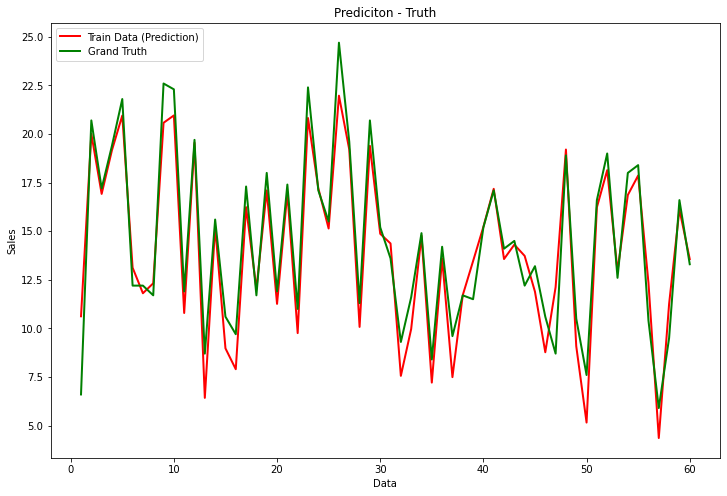

In [30]:
indexler=range(1,61)
fig,ax= plt.subplots(figsize=(12,8))
ax.plot(indexler, ypred, label="Train Data (Prediction)", color="red", linewidth=2)
ax.plot(indexler, y_test, label="Grand Truth", color="green", linewidth=2)

plt.title("Prediciton - Truth")
plt.xlabel("Data")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

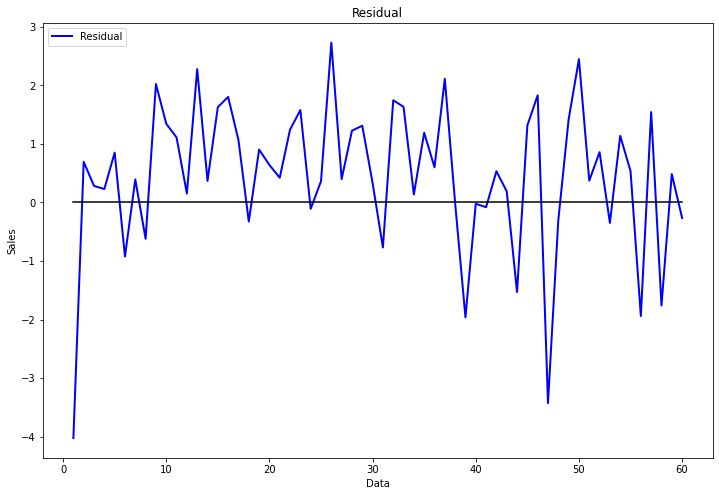

In [31]:
#Her bir nokta için hataları çizmek
indexler=range(1,61)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test-ypred, label="Residual",color="blue",linewidth=2)
ax.plot(indexler,np.zeros(60),color="black")

plt.title("Residual")
plt.xlabel("Data")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

In [32]:
#Hata hesaplaması, Root Mean Square Error (RMSE)
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
r2=r2_score(y_test, ypred)
r2*100

90.58622107532247

In [34]:
mse=mean_squared_error(y_test, ypred)

In [35]:
import math
rmse= math.sqrt(mse)
rmse

1.3603977338130544

**OLS**

In [36]:
import statsmodels.api as sm

In [37]:
# statsmodels ile OLS (Ordinary Least Squares) çalıştır
# statsmodels ols fonksiyonu beta_0 için otomatik değer atamaz
# o yüzden beta_0 için 1 katsayısını bizim eklememiz lazım

Xtrain_ols=sm.add_constant(X_train)

In [38]:
#Const sütunu eklenmiş oldu
Xtrain_ols

,const,TV,radio,newspaper
75,1.0,213.4,24.6,13.1
4,1.0,151.5,41.3,58.5
186,1.0,205.0,45.1,19.6
27,1.0,142.9,29.3,12.6
91,1.0,134.3,4.9,9.3
...,...,...,...,...
88,1.0,110.7,40.6,63.2
104,1.0,187.9,17.2,17.9
68,1.0,139.3,14.5,10.2
25,1.0,62.3,12.6,18.3


In [109]:
#önce y sonra x verilir
sm_model= sm.OLS(y_train, Xtrain_ols)

In [42]:
sonuc = sm_model.fit()
print(sonuc.summary())
"""
Tablo sonucuna bakacak olursak newspaperın katsayısının küçük olduğunu ve etkilemediğini söylemiştik.
p kısmında 0.05'ten büyük bir tek newspaper var bu yüzden dikkate almıyoruz sadece küçüklerle ilgileniyoruz.
Bu yüzden newspaperı çıkarıp yeniden model kuracağız.
"""

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           9.97e-66
Time:                        20:31:13   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

"\nTablo sonucuna bakacak olursak newspaperın katsayısının küçük olduğunu ve etkilemediğini söylemiştik.\np kısmında 0.05'ten büyük bir tek newspaper var bu yüzden dikkate almıyoruz sadece küçüklerle ilgileniyoruz.\nBu yüzden newspaperı çıkarıp yeniden model kuracağız.\n"

**KORELASYON**

<AxesSubplot:>

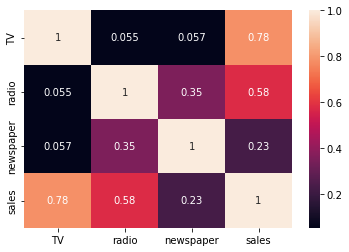

In [44]:
#Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir
sns.heatmap(df.corr(),annot=True)

In [54]:
#Bu aşamadan sonra newspaperın çıkartılmış haliyle yeniden kod yazılacaktır.
Xtrain_yeni=X_train[["TV","radio"]]
Xtrain_yeni.head()

,TV,radio
75,213.4,24.6
4,151.5,41.3
186,205.0,45.1
27,142.9,29.3
91,134.3,4.9


In [55]:
Xtest_yeni=X_test[["TV","radio"]]
Xtest_yeni.head()

,TV,radio
127,7.8,38.9
105,238.2,34.3
100,135.2,41.7
93,217.7,33.5
112,241.7,38.0


In [57]:
# modeli tekrar kurgula
lr.fit(Xtrain_yeni,y_train)

LinearRegression()

In [61]:
ypred_yeni=lr.predict(Xtest_yeni)
ypred_yeni

array([[10.56198847],
       [20.16735504],
       [16.90186462],
       [19.07993718],
       [21.03892699],
       [13.13621118],
       [11.80982028],
       [12.39007729],
       [20.59914742],
       [21.04083466],
       [10.88508869],
       [19.38624121],
       [ 6.37517955],
       [15.33164571],
       [ 8.96088175],
       [ 7.95144449],
       [16.38791571],
       [11.97017124],
       [17.24725749],
       [11.20901475],
       [17.11470022],
       [ 9.70819803],
       [20.79788275],
       [17.20749366],
       [15.18035107],
       [22.18189008],
       [19.17555656],
       [10.05518823],
       [19.5883307 ],
       [14.98424867],
       [14.39922454],
       [ 7.65095995],
       [ 9.84543862],
       [14.78150095],
       [ 7.22855505],
       [13.69168479],
       [ 7.43358375],
       [11.75347003],
       [13.50004784],
       [15.057806  ],
       [17.06957807],
       [13.68351323],
       [14.23222825],
       [13.70744537],
       [11.96487996],
       [ 8

In [63]:
# yeni OLS'i gör
X_train_yeni_ols=sm.add_constant(Xtrain_yeni)

In [65]:
# statsmodels OLS modeli oluştur
sm_model = sm.OLS(y_train, X_train_yeni_ols)

In [67]:
# OLS modelinin sonuçlarını al

sonuc = sm_model.fit()

In [69]:
# OLS Özet tablosunu yazdır

print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           4.46e-67
Time:                        20:47:48   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

Şu anda iki değişkenimiz de (TV, radio) önemli (significant).
Çünkü p-değerleri 0.05'ten küçük.

**Backward Elimination**
Newspaperı çıkarıp tekrar kod yazma işlemine deniyor.
Eğer böyle değil de, herhangi birinin p-değeri 0.05'ten büyük olsaydı,

Onu da çıkarıp tekrar bir LineerRegression çalışıtıracaktık.

Bu döngü bu şekilde devam eder.

Ta ki, tüm değişkenler önemli olarak kalana kadar.

In [72]:
#Sadece Newspaper olsaydı satışı ne kadar anlatabilirdi? Gerçekten önemsiz miydi?

X=df["newspaper"]
y=df["sales"]

X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# statsmodels OLS
X_train_ols = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_ols)
result = model.fit()

# OLS Özet tablosunu yazdır
print(result.summary())

#adjusted=ayarlanmış

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.65
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           0.000195
Time:                        20:57:51   Log-Likelihood:                -430.09
No. Observations:                 140   AIC:                             864.2
Df Residuals:                     138   BIC:                             870.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4844      0.763     15.052      0.0

**Adjustes R-Square:**

Multiple Lineer Regresyon Yöntemlerinde, Backward Selection'ı bir örnekle gördük.

Başka bir çözüm yolu ise Forward Selection'dır.

Forward Selection'da, belli bir sayıda değişken ile başlanır ve her seferinde yeni bir değişken eklenerek ilerlenir.

Her yeni değişken demek biraz daha iyileşmesi demek tahminin (en kötü ihtimalle aynı kalır.)

İşte biraz daha iyileşme demek  𝑅2
  nin artması demek.

Ama bu artma yanıltıcı olabilir. Sırf bir değişken eklediğimiz için  𝑅2
  nin artması çok doğru olmaz.

Bunu egale etmek için Adjusted  𝑅2
  vardır.

Dolayısı ile Multiple Lineer Regression analizlerinde, Adjusted  𝑅2
  daha güvenilir olarak kabul edilir.

**KATEGORİK DATA**

Biz hep sayısal verilerle çalıştık ama veriler her zaman sayısal olmaz kategoriktir. Biz bunları sayıya çeviririz.

Dolayısı ile kategorik verilerin bir şekilde sayısal veriye dönüştürülmesi lazım.
İki tür dönüşüm (encoding) yapılabilir:
Label Encoding
One-Hot Encoding

In [1]:
#Label Encoding with pandas
#importlar
import pandas as pd
import numpy as np

In [2]:
# ham veri
evlilik_durumu = ('Evli','Bekar','Belirtilmemis')

# dataframe yarat
evlilik_df = pd.DataFrame(evlilik_durumu, columns=['Evlilik_Durumu'])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [3]:
# sütun tipini gör -> object (biz bunun category tipinde olmasını istiyoruz.)

evlilik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Evlilik_Durumu  3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [4]:
# astype sütun tipini 'category' ye dönüştür

evlilik_df['Evlilik_Durumu'] = evlilik_df['Evlilik_Durumu'].astype('category')

In [5]:
# sütun tipini tekrar gör -> object

evlilik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Evlilik_Durumu  3 non-null      category
dtypes: category(1)
memory usage: 263.0 bytes


In [7]:
# kategorilere numerik veriler ata ve yeni bir sütun yarat

evlilik_df['Evlilik_Kategorileri'] = evlilik_df['Evlilik_Durumu'].cat.codes  #yanına sütun ekleniyor
evlilik_df

,Evlilik_Durumu,Evlilik_Kategorileri
0,Evli,2
1,Bekar,0
2,Belirtilmemis,1


In [8]:
#Label Encoding with scikit learn
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #veri önişleme

In [13]:
evlilik_durumu=("Evli","Bekar","Belirtilmemis")

evlilik_df= pd.DataFrame(evlilik_durumu, columns=["Evlilik_durumu"])
evlilik_df

,Evlilik_durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [15]:
# labelEncoder nesnesi yarat
label_encoder=LabelEncoder()

In [19]:
# kategorilere numerik veriler ata ve yeni bir sütun yarat
evlilik_df ["Evlilik_Kategorileri_sklearn"]=label_encoder.fit_transform(evlilik_df["Evlilik_durumu"])
evlilik_df

,Evlilik_durumu,Evlilik_KAtegorileri_sklearn,Evlilik_Kategorileri_sklearn
0,Evli,2,2
1,Bekar,0,0
2,Belirtilmemis,1,1


**One-Hot Encoder**
Label Encoding ile kategorik sütunları sayısal verilere dönüştürdük.

Ama ortaya başka bir sorun çıktı.

Şu anda sanki değer 2 olan kategori 1 ve 0'dan önemliymiş gibi zannedilecek.

Öyse önem sırası yoktu.

In [21]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [23]:
evlilik_durumu=("Evli","Bekar","Belirtilmemis")
evlilik_df= pd.DataFrame(evlilik_durumu, columns=["Evlilik_Durumu"])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [26]:
# one-hot encoder nesnesi yarat
enc=OneHotEncoder(handle_unknown='ignore') #ignore=görmezden gelmek, bu satırda boş bırakılnalar siliniyor.

In [28]:
# evlilik durumunu enc'ye ver
enc_result = enc.fit_transform(evlilik_df[['Evlilik_Durumu']])

In [29]:
# enc_result'ı dataframe'e çevir

enc_df = pd.DataFrame(enc_result.toarray())
enc_df

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0


In [30]:
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [31]:
# yeni olan enc_df'i evlilik_df'e ekle

evlilik_df = evlilik_df.join(enc_df)
evlilik_df #birebir kodlama kesişen kısımlara değer verip kalan kısmı 0 yapma

,Evlilik_Durumu,0,1,2
0,Evli,0.0,0.0,1.0
1,Bekar,1.0,0.0,0.0
2,Belirtilmemis,0.0,1.0,0.0


In [32]:
#pandas ile:
import pandas as pd
import numpy as np

In [33]:
# ham veri
evlilik_durumu = ('Evli','Bekar','Belirtilmemis')

# dataframe yarat
evlilik_df = pd.DataFrame(evlilik_durumu, columns=['Evlilik_Durumu'])
evlilik_df

,Evlilik_Durumu
0,Evli
1,Bekar
2,Belirtilmemis


In [34]:
# her bir kolon için -> binary (0, 1) değerler olan sütunlar üret dummies=önemsiz,manken

dummy_df = pd.get_dummies(evlilik_df, columns=['Evlilik_Durumu'])
dummy_df

,Evlilik_Durumu_Bekar,Evlilik_Durumu_Belirtilmemis,Evlilik_Durumu_Evli
0,0,0,1
1,1,0,0
2,0,1,0


In [35]:
# df'leri birleştir

evlilik_df = evlilik_df.join(dummy_df)
evlilik_df

,Evlilik_Durumu,Evlilik_Durumu_Bekar,Evlilik_Durumu_Belirtilmemis,Evlilik_Durumu_Evli
0,Evli,0,0,1
1,Bekar,1,0,0
2,Belirtilmemis,0,1,0
